# Machine Learning
# Answer 1

In [1]:
#Importing required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

#For visualizing trending hashtags and captions
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install wordcloud

In [3]:
#Reading the csv file

df = pd.read_csv("instagram_reach.csv")
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


# Preprocessing

In [4]:
#df have 100 rows and 8 columns

df.shape

(100, 8)

In [5]:
#Column values

df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [6]:
#Droping the 'Unnamed: 0' since it is not needed

df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [7]:
#Droping the 'S.No' since we are already having default row indexes for uniquely identifying the records

df.drop(['S.No'], axis=1, inplace = True)
df

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [8]:
#Column values is now not containing 'Unnamed: 0'

df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [9]:
#From below it is clear that caption have around 6 missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [10]:
#Verifying the count of missing values column wise.

df.isna().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [11]:
#Generating the statistical description of the dataset

df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [12]:
#Since only 6 caption values are missing so we can drop the respective rows where caption is missing.

df = df.dropna()

In [13]:
df

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [14]:
#We can see now that all the rows with null caption values are now removed

df.isna().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [15]:
#'Times since posted' will be much easier for the model to interpret if it is in numeric form.
Time_since_posted_in_hours=[]

for i in df['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

series = pd.Series(Time_since_posted_in_hours)
df['Times since posted in hours'] = series.values
df['Times since posted in hours'] = pd.to_numeric(df['Times since posted in hours'])
df = df.drop('Time since posted', axis=1)

C:\Users\seema\AppData\Local\Temp\ipykernel_27124\4275202278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Times since posted in hours'] = series.values
C:\Users\seema\AppData\Local\Temp\ipykernel_27124\4275202278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Times since posted in hours'] = pd.to_numeric(df['Times since posted in hours'])


In [16]:
df

,USERNAME,Caption,Followers,Hashtags,Likes,Times since posted in hours
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,31,3
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,42,3
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,10,3
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,222,3


In [17]:
#We can clearly observe that now 'Times since posted in hours' column is converted into numeric from respective object dtype

df['Times since posted in hours'].info()

<class 'pandas.core.series.Series'>
Int64Index: 94 entries, 0 to 99
Series name: Times since posted in hours
Non-Null Count  Dtype
--------------  -----
94 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


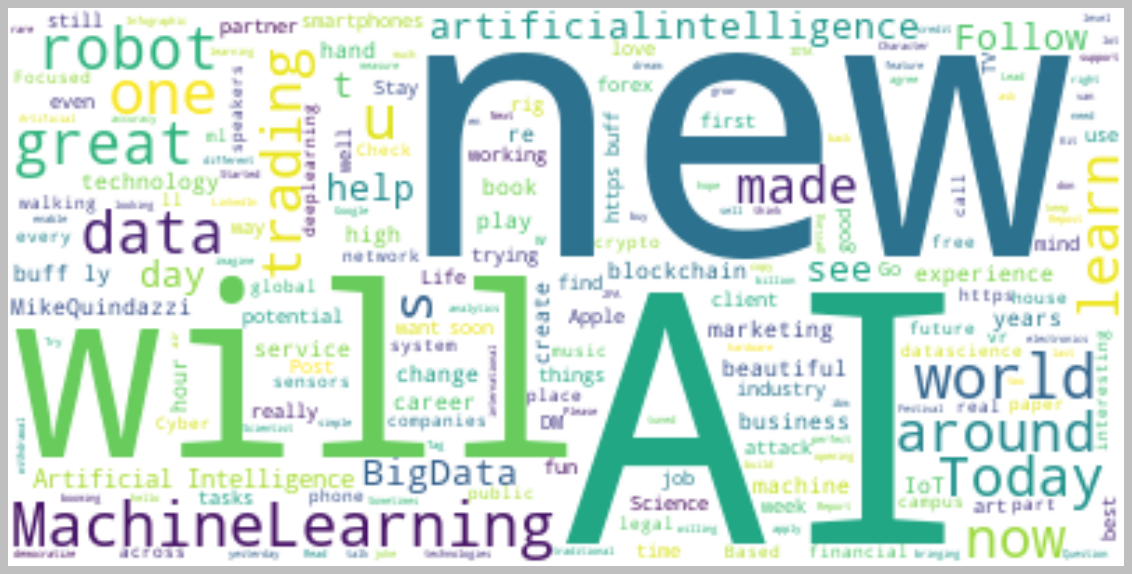

In [18]:
#Visualizing trending captions using wordcloud pythonic library

text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

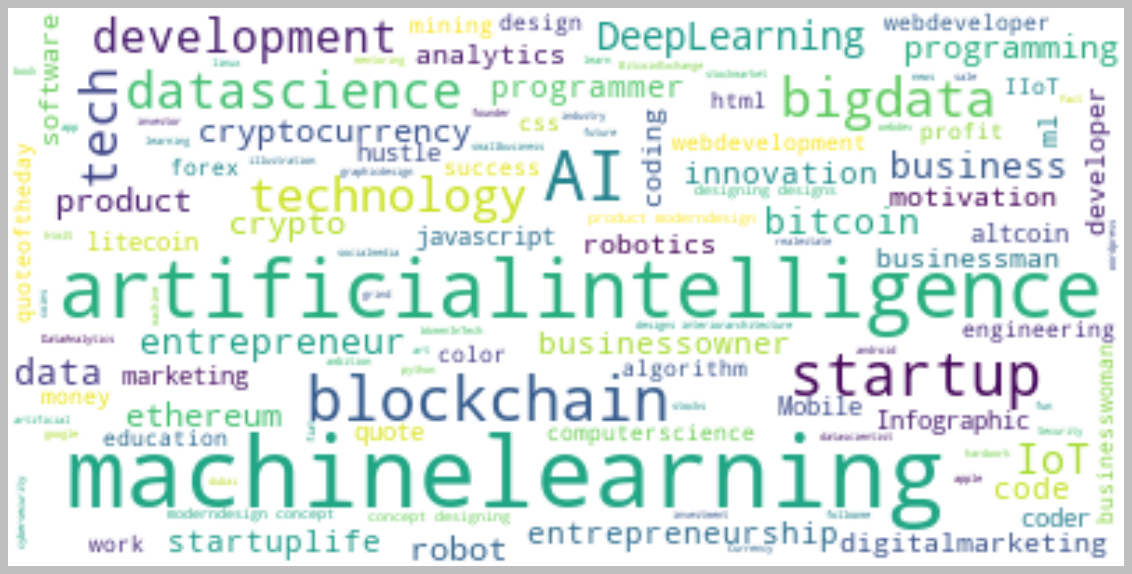

In [19]:
#Visualizing trending hashtags using wordcloud pythonic library

text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\seema\AppData\Local\Temp\ipykernel_27124\1842760488.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


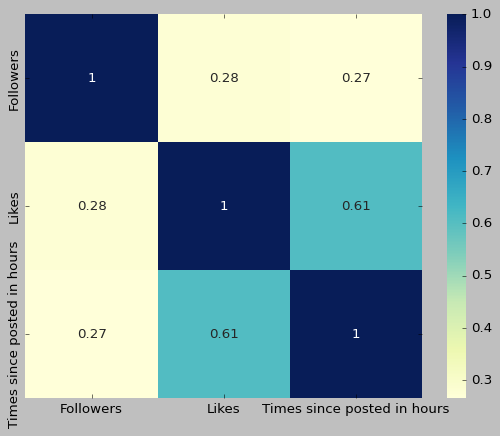

In [20]:
#Visualizing correlation between features(Independent and dependent) using heat map
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Intuation behind selecting the independent variables that can be used fors predicting the dependent features:

 - We need to predict the Likes and Time. Therefore, these 2 features will be treated as dependent features.
 - High correaltion means higly similar hence we need to drop such features since there is no point of taking the reduntant features.
 - We can clearly observe from the above heatmap that both Likes and Time dependent features are very less correalted with Followers. Therefore, this can be taken as one of the dependent feature.
 - If we compare Like(along x) with Time(along y) then we will get correaltion value 0.61 This is bit high but significant enough to be taken as an dependent feature. Therefore, Time can be considered as dependent feature.
 - If we compare Time(along x) with Like(along y) then correaltion value will be 0.61. Also we can observe that this is pretty high and very close to correaltion 1(depicted by Time(along x) and Time(along y)). Therefore, we can say that Like and Time are very similar and only 1 among them can be considered as an dependent feature. Since, in earlier step we have already considered Time as depenpendent feature. Therefore, we will drop Likes as consider Time as an dependent feature.
 
 - To conclude, Followers and Time will be taken as independent feature. Whereas, Likes ans Time will be considered as an dependent features.
 

 
 


# Training and Test data spliting

In [21]:
#pip install xgboost

In [22]:
#Define x (Independent) variables and y (Dependent) variable
x = df[['Followers', 'Times since posted in hours']]
y_likes = df['Likes'] #Target variable for Likes
y_time_since_posted = df['Times since posted in hours']  #Target variable for Time since posted

# Split the data into training and testing sets
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(x, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [23]:
#Printing dimensions of each of the above splits:
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

print('-'*100)
print("Dimension of y_likes_train:", y_likes_train.shape)
print("Dimension of y_likes_test:", y_likes_test.shape)

print('-'*100)
print("Dimension of y_time_train:", y_time_train.shape)
print("Dimension of y_time_test:", y_time_test.shape)


Dimension of X_train: (75, 2)
Dimension of X_test: (19, 2)
----------------------------------------------------------------------------------------------------
Dimension of y_likes_train: (75,)
Dimension of y_likes_test: (19,)
----------------------------------------------------------------------------------------------------
Dimension of y_time_train: (75,)
Dimension of y_time_test: (19,)


In [24]:
#Creating learning model for predicting likes using XGBRegressor
likes_model = XGBRegressor()
likes_model.fit(X_train, y_likes_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
#Creating learning model for predicting time using XGBRegressor
time_model = XGBRegressor()
time_model.fit(X_train, y_time_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
# Make predictions on the test set
likes_predictions = likes_model.predict(X_test)
time_predictions = time_model.predict(X_test)

In [27]:
# Evaluate the model
likes_score = likes_model.score(X_test, y_likes_test)
time_score = time_model.score(X_test, y_time_test)

In [28]:
# Print the evaluation scores
print("Likes Prediction Score:", likes_score)
print("Time Since Posted Prediction Score:", time_score)

Likes Prediction Score: 0.41125702564736255
Time Since Posted Prediction Score: 0.9525539567480856
